According to Federal Reserve Economic Data, credit card delinquency rates have been increasing and bank perfroms a charge off and will encounter losses.If there is a way to predict which customers have the highest rate of defaulting, it may be prevented.

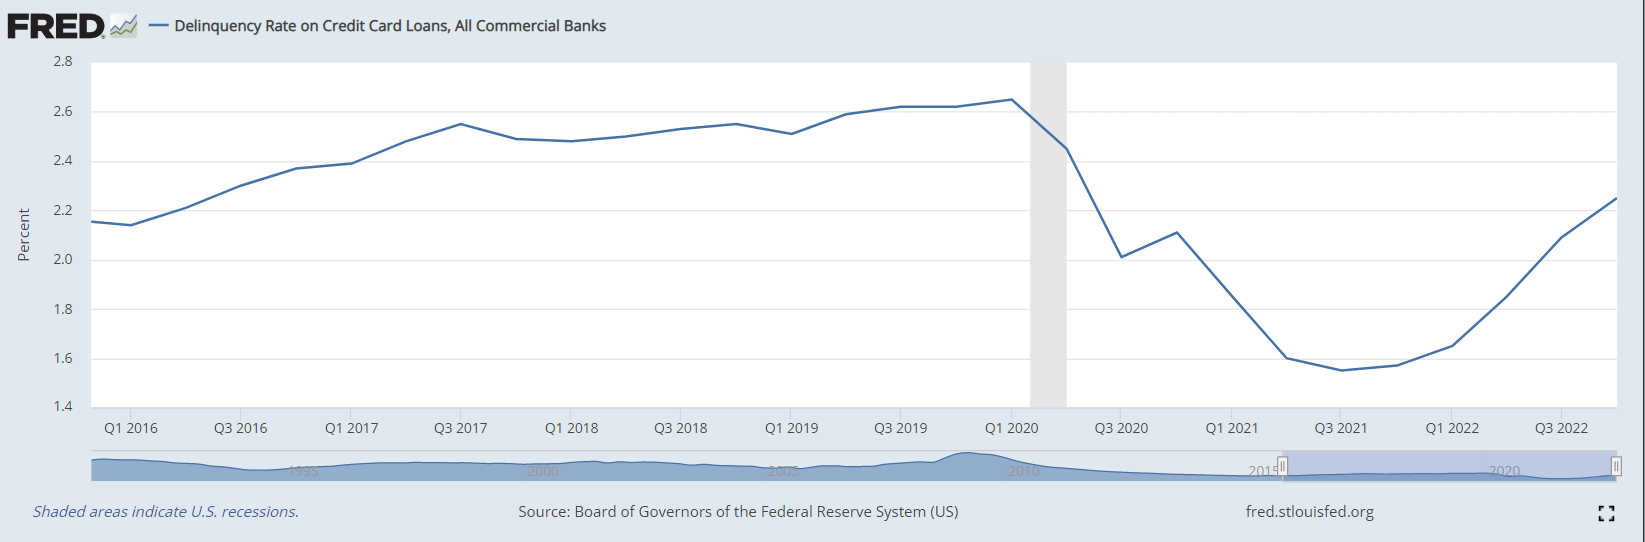


Source: [Fred](https://fred.stlouisfed.org/graph/?g=Bod4)

## Problem 

Can we reliablly predict who is likely to default?

## Data - [Credit Card Data](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)

## Exploratory Data Analysis

In [167]:
# Importing required libraries
import numpy as np
import pandas as pd
from pandas import set_option
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import randint
plt.style.use('ggplot')

from sklearn.preprocessing import MinMaxScaler,StandardScaler 
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV,cross_val_score
from sklearn.feature_selection import RFE,SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings("ignore")

In [168]:
# Reading the excel file
data = pd.read_excel('default of credit card clients.xls')

In [169]:
data.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 25 columns]

In [170]:
#Checking the shape of the data
data.shape

(30000, 25)

In [171]:
# Checking the description of data
data.describe()

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default payment next month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 25 columns]

In [172]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [173]:
# checking for any missing values
total_nulls= data.isnull().sum().sort_values(ascending = False)
percentage =100*(data.isnull().sum()/data.isnull().count()).sort_values(ascending = False)
pd.concat([total_nulls, percentage], axis=1, keys=['Total', 'Percent']).transpose()

ID  BILL_AMT2  PAY_AMT6  PAY_AMT5  PAY_AMT4  PAY_AMT3  PAY_AMT2  \
Total    0.0        0.0       0.0       0.0       0.0       0.0       0.0   
Percent  0.0        0.0       0.0       0.0       0.0       0.0       0.0   

         PAY_AMT1  BILL_AMT6  BILL_AMT5  ...  PAY_5  PAY_4  PAY_3  PAY_2  \
Total         0.0        0.0        0.0  ...    0.0    0.0    0.0    0.0   
Percent       0.0        0.0        0.0  ...    0.0    0.0    0.0    0.0   

         PAY_0  AGE  MARRIAGE  EDUCATION  SEX  default payment next month  
Total      0.0  0.0       0.0        0.0  0.0                         0.0  
Percent    0.0  0.0       0.0        0.0  0.0                         0.0  

[2 rows x 25 columns]

It can be seen from above that there are no missing values.

## Checking for data imbalance

In [174]:
temp = data["default payment next month"].value_counts()
print(temp.index)
print(temp.values)

Int64Index([0, 1], dtype='int64')
[23364  6636]


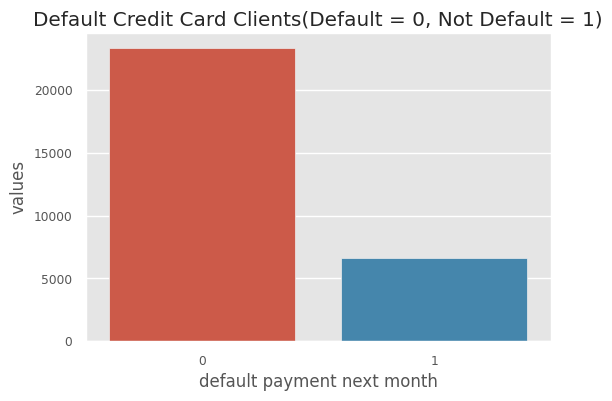

In [175]:
temp= pd.DataFrame({'default payment next month': temp.index,'values': temp.values})
plt.figure(figsize = (6,4))
plt.title('Default Credit Card Clients(Default = 0, Not Default = 1)')
sns.barplot(data=temp,x = 'default payment next month', y='values')
plt.show()

### Data Preprocessing

In [176]:
# Renaming the column PAY_0 as PAY_1 to maintain sequence
data.rename(columns={'PAY_0':'PAY_1'},inplace=True)

In [177]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

### Cleaning EDUCATION column of data

In [178]:
data.EDUCATION.unique()

array([2, 1, 3, 5, 4, 6, 0])

In [179]:
 # 1 = graduate school,2 = university, 3 = high school,4 = others,5 = unknown,6 = unknown
 # Replacing the EDUCATION column values 0,5,6 with 4 as they are unknown
data_unknown_ed = (data['EDUCATION'] == 5) | (data['EDUCATION'] == 6) | (data['EDUCATION'] == 0)
data.loc[data_unknown_ed, 'EDUCATION'] = 4

In [180]:
data.EDUCATION.unique()

array([2, 1, 3, 4])

### Cleaning MARRIAGE column of data

In [181]:
data.MARRIAGE.unique()

array([1, 2, 3, 0])

In [182]:
 #1 = married,2 = single,3 = others
 # Replacing the MARRAIGE column value 0 with 3 as 0 is unknown/not defined
# Cleaning Marriage
data_marritalstat_unknown = data['MARRIAGE'] == 0
data.loc[data_marritalstat_unknown, 'MARRIAGE'] = 3

In [183]:
data.MARRIAGE.unique()

array([1, 2, 3])

In [184]:
# Renaming the columns for readability
data.rename(columns={'PAY_1':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
data.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
data.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [185]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR',
       'default payment next month'],
      dtype='object')

In [186]:
# Coverting the age column to categorical variable by binning the age
def ageBinning(a):
  if a>20 and a<=30:
    age='20-30'
  elif a>30 and a<=40:
    age= '31-40'
  elif a>40 and a<=50:
    age= '41-50'
  else:
    age= '60+'
  return age

data['ageBin']=data['AGE'].apply(ageBinning)

In [187]:
data.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_SEPT  PAY_AUG  PAY_JUL  \
0   1      20000    2          2         1   24         2        2       -1   
1   2     120000    2          2         2   26        -1        2        0   
2   3      90000    2          2         2   34         0        0        0   
3   4      50000    2          2         1   37         0        0        0   
4   5      50000    1          2         1   57        -1        0       -1   

   PAY_JUN  ...  BILL_AMT_MAY  BILL_AMT_APR  PAY_AMT_SEPT  PAY_AMT_AUG  \
0       -1  ...             0             0             0          689   
1        0  ...          3455          3261             0         1000   
2        0  ...         14948         15549          1518         1500   
3        0  ...         28959         29547          2000         2019   
4        0  ...         19146         19131          2000        36681   

   PAY_AMT_JUL  PAY_AMT_JUN  PAY_AMT_MAY  PAY_AMT_APR  \
0            0            0            0            0   
1         1000         1000            0         2000   
2         1000         1000         1000         5000   
3         1200         1100         1069         1000   
4        10000         9000          689          679   

   default payment next month  ageBin  
0                           1   20-30  
1                           1   20-30  
2                           0   31-40  
3                           0   31-40  
4                           0     60+  

[5 rows x 26 columns]

In [188]:
# Plotting Box plots to check outliers

lst_box = data[[ 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']]

# Box plot to detect outliers
plt.figure(figsize = (70,150))
sns.set_theme()
for i in enumerate(lst_box):
  plt.subplot(12, 2, i[0]+1)
  sns.set(font_scale = 2)
  sns.boxplot(data[i[1]],color='#6C9DBF')
  plt.xlabel(i[1], fontsize=40)
sns.reset_orig()

In [45]:
# Since 90 percent of our PAY data lies between -2 and 1 we will remove rest of the observations
data = data[(data.PAY_SEPT < 2) & (data.PAY_AUG < 2) & (data.PAY_JUL < 2) & (data.PAY_JUN < 2) & (data.PAY_MAY < 2)  & (data.PAY_MAY < 2) & (data.PAY_APR < 2)]

In [47]:
# Removing outliers using z score method on Limit Balance column.
data['Z_LIMIT_BAL'] = np.abs(stats.zscore(data['LIMIT_BAL']))
data = data[(data['Z_LIMIT_BAL'] < 3)]
data.drop(['Z_LIMIT_BAL'],axis=1,inplace=True)

# Treating Age Column
data=data[(data.AGE)<61]

# Treating Education Column
data=data[(data.EDUCATION)<4]

In [52]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR',
       'default payment next month', 'ageBin'],
      dtype='object')

## Exploratory Data Analysis

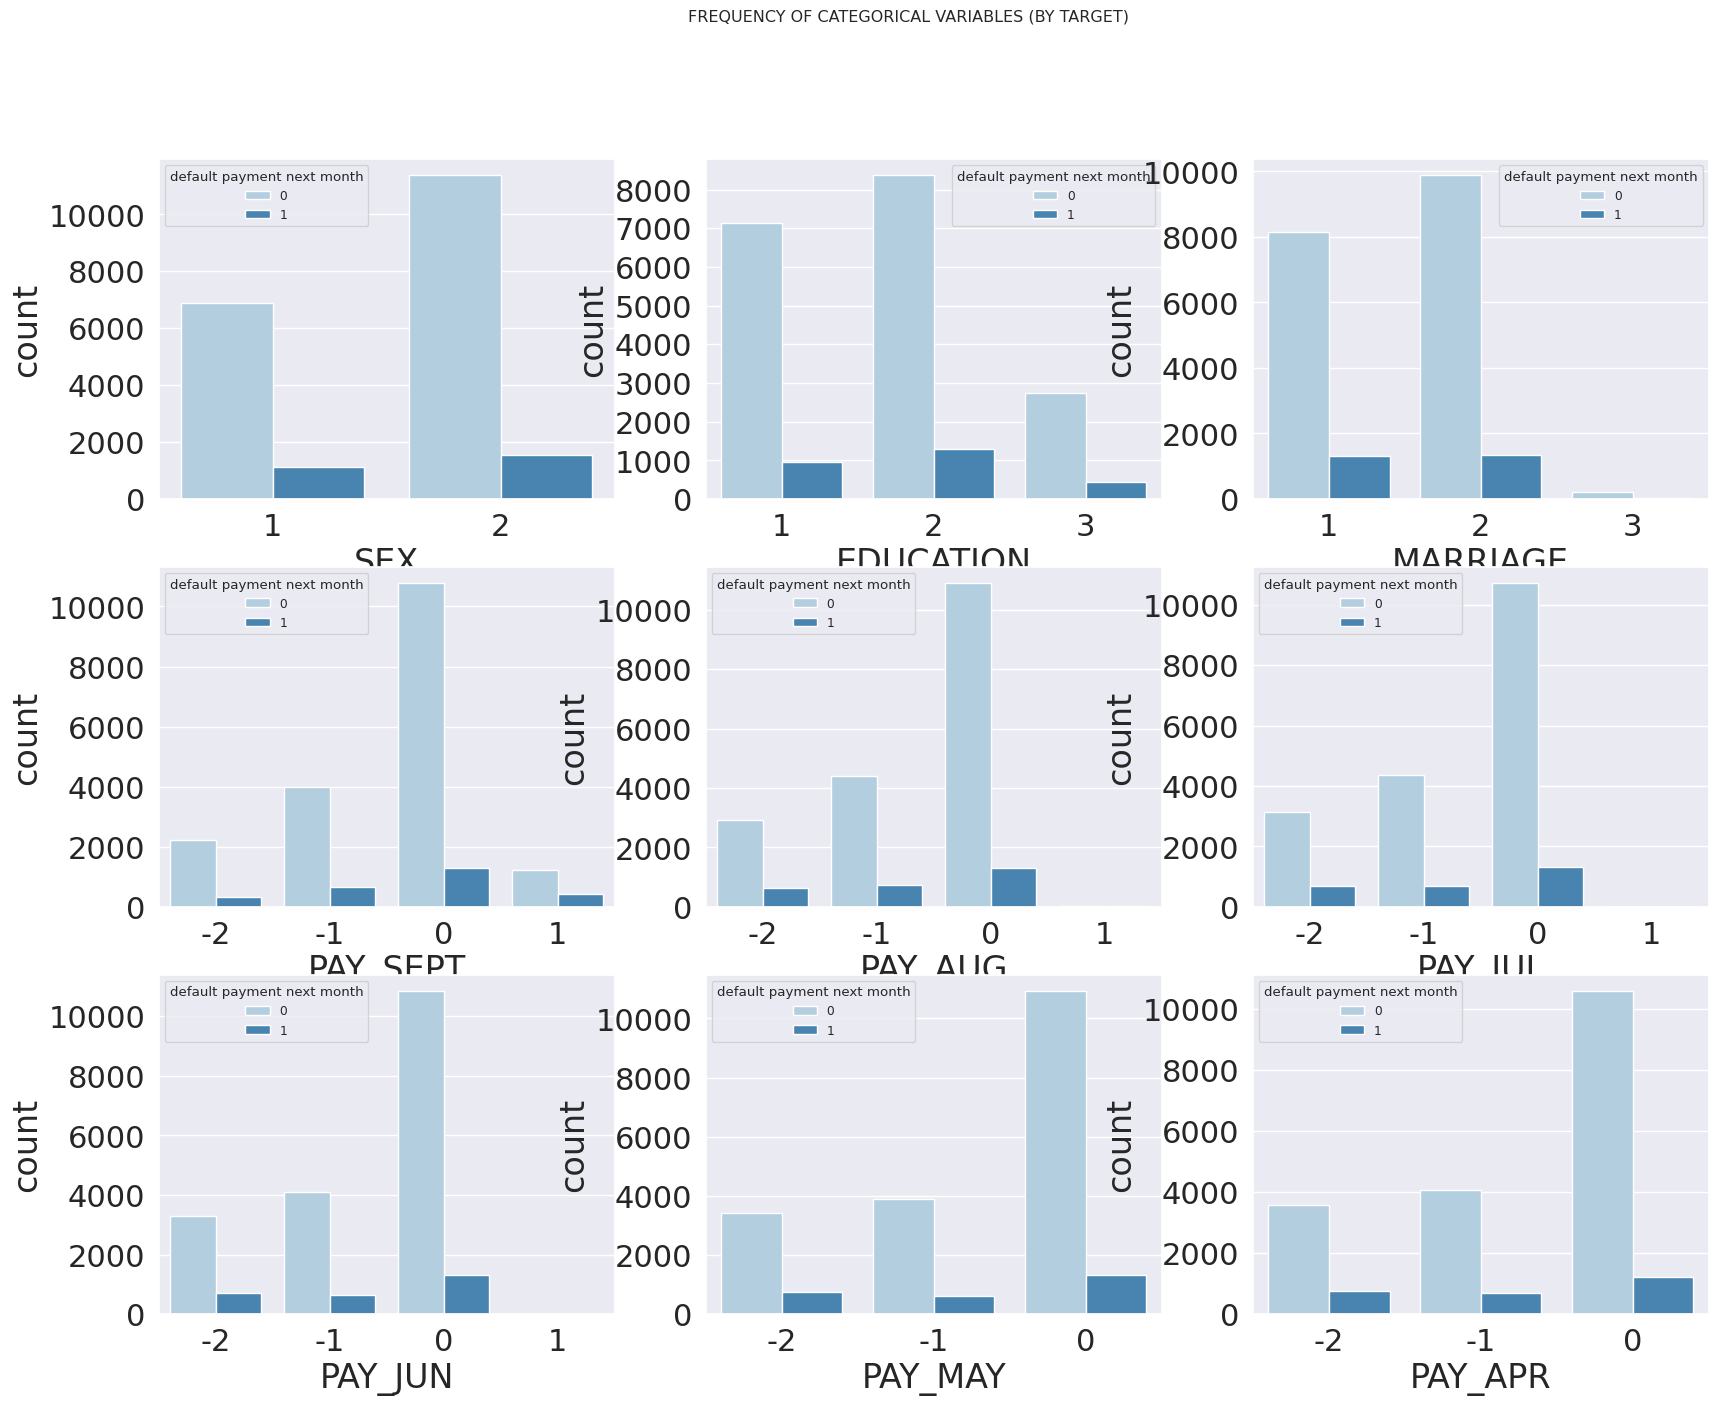

In [161]:
# Creating a new dataframe with categorical variables
subset = data[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 
               'PAY_MAY', 'PAY_APR', 'default payment next month']]

f, axes = plt.subplots(3, 3, figsize=(20, 15), facecolor='white')
sns.set(font_scale=0.8)
f.suptitle('FREQUENCY OF CATEGORICAL VARIABLES (BY TARGET)')
ax1 = sns.countplot(x="SEX", hue="default payment next month", data=subset, palette="Blues", ax=axes[0,0])
ax2 = sns.countplot(x="EDUCATION", hue="default payment next month", data=subset, palette="Blues",ax=axes[0,1])
ax3 = sns.countplot(x="MARRIAGE", hue="default payment next month", data=subset, palette="Blues",ax=axes[0,2])
ax4 = sns.countplot(x="PAY_SEPT", hue="default payment next month", data=subset, palette="Blues", ax=axes[1,0])
ax5 = sns.countplot(x="PAY_AUG", hue="default payment next month", data=subset, palette="Blues", ax=axes[1,1])
ax6 = sns.countplot(x="PAY_JUL", hue="default payment next month", data=subset, palette="Blues", ax=axes[1,2])
ax7 = sns.countplot(x="PAY_JUN", hue="default payment next month", data=subset, palette="Blues", ax=axes[2,0])
ax8 = sns.countplot(x="PAY_MAY", hue="default payment next month", data=subset, palette="Blues", ax=axes[2,1])
ax9 = sns.countplot(x="PAY_APR", hue="default payment next month", data=subset, palette="Blues", ax=axes[2,2]);

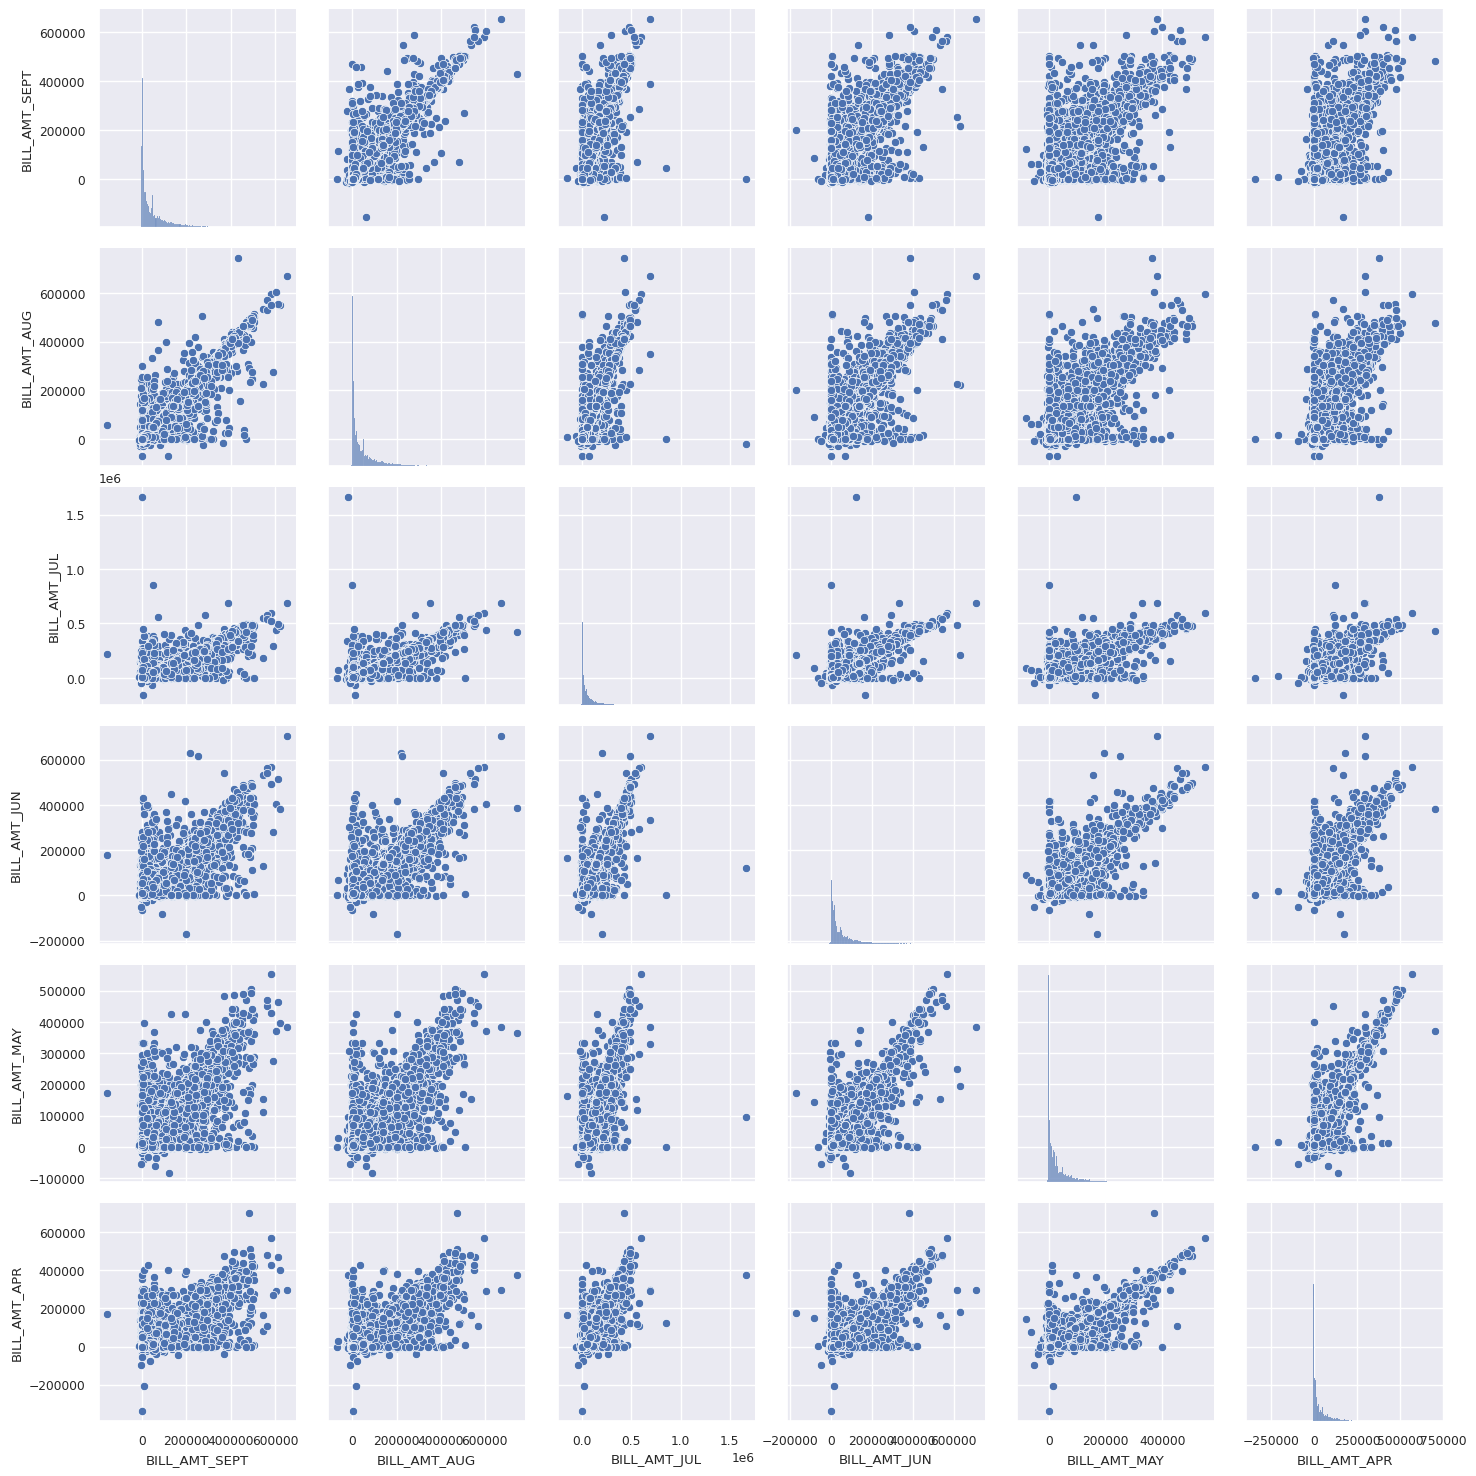

In [82]:
# Checking correlation between BILL_AMT Columns
sns.set(font_scale=0.8)
sns.pairplot(data = data[['BILL_AMT_SEPT','BILL_AMT_AUG','BILL_AMT_JUL','BILL_AMT_JUN','BILL_AMT_MAY','BILL_AMT_APR']])

Bill amount for each month is highly correlated with each other hence we will try to feature engineer bill amount to Dues column to reduce multicollinearity

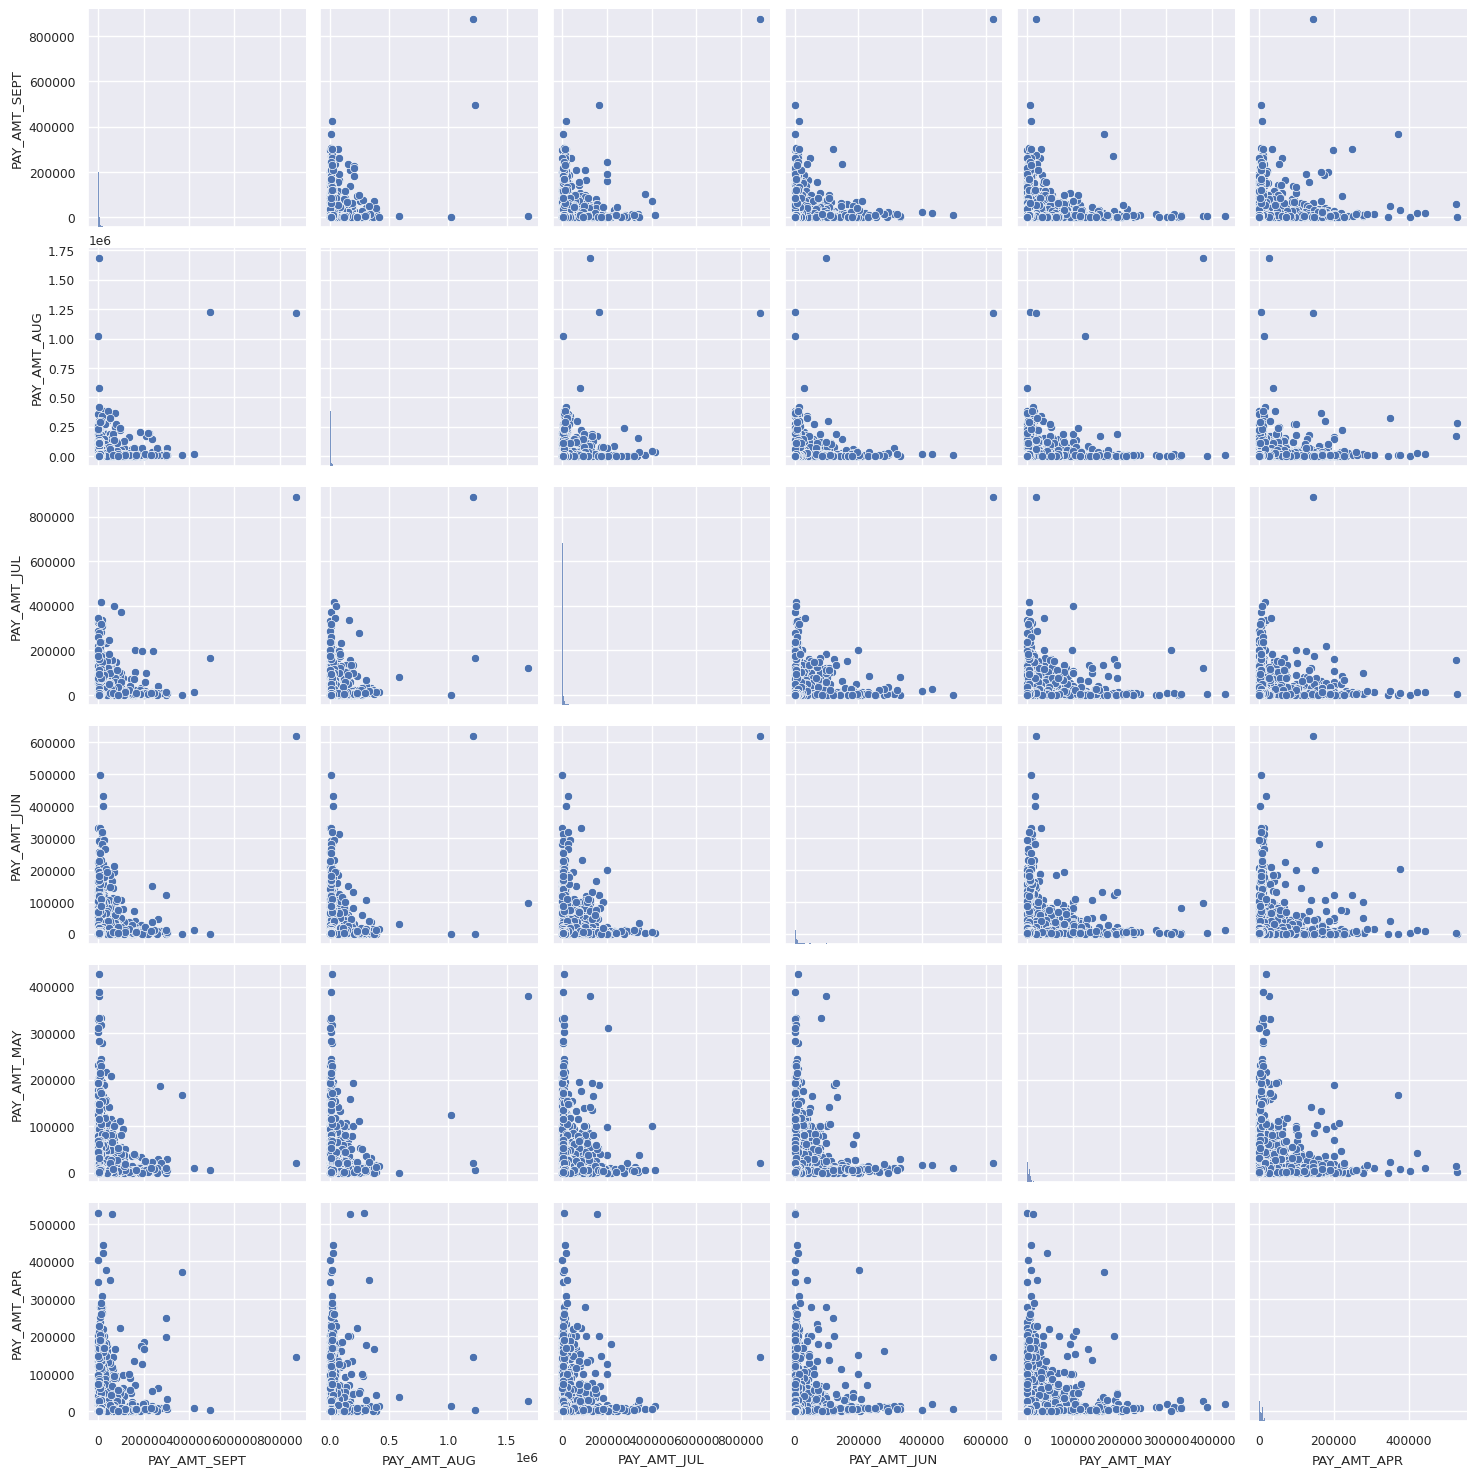

In [74]:
# Checking correlation between BILL_AMT Columns
sns.set(font_scale=0.8)
sns.pairplot(data = data[[ 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL','PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']],palette='Greens_d')

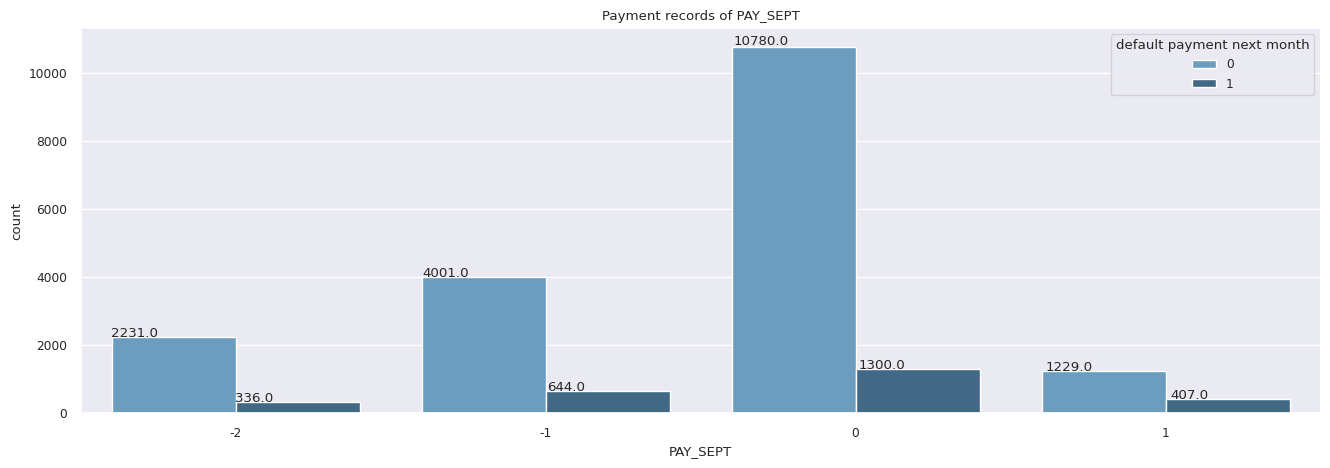

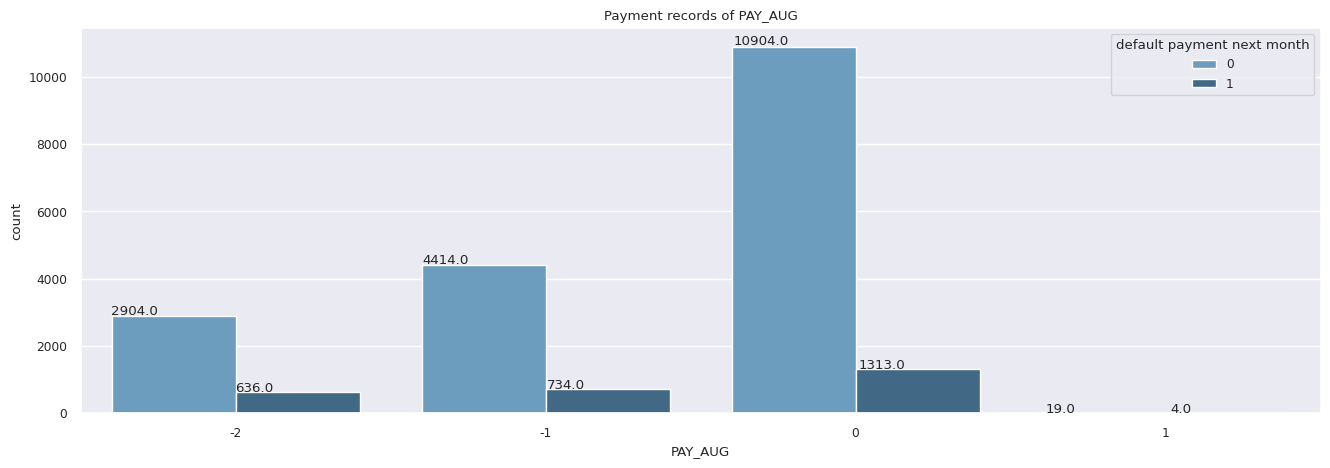

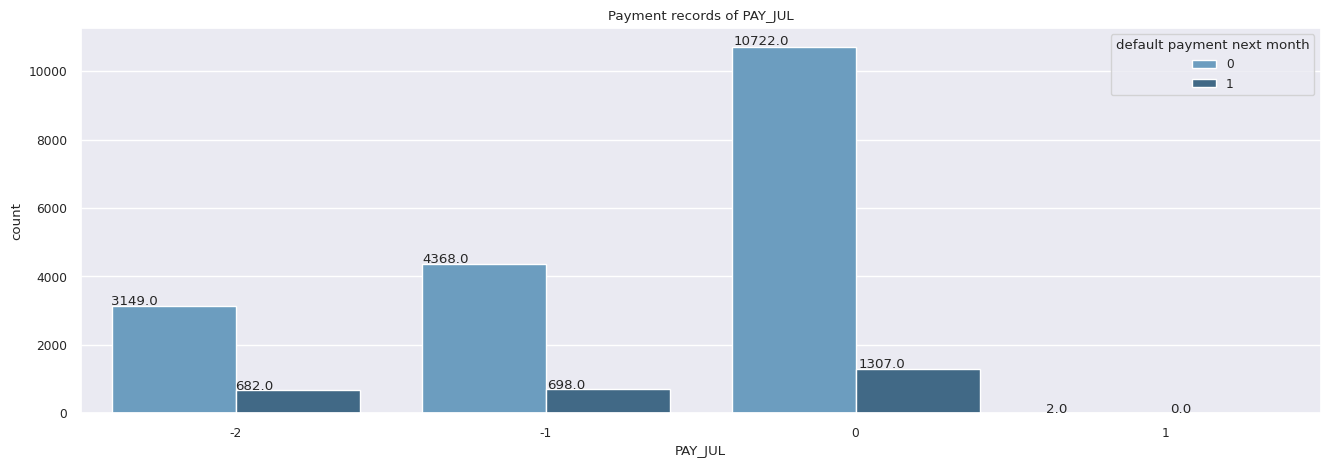

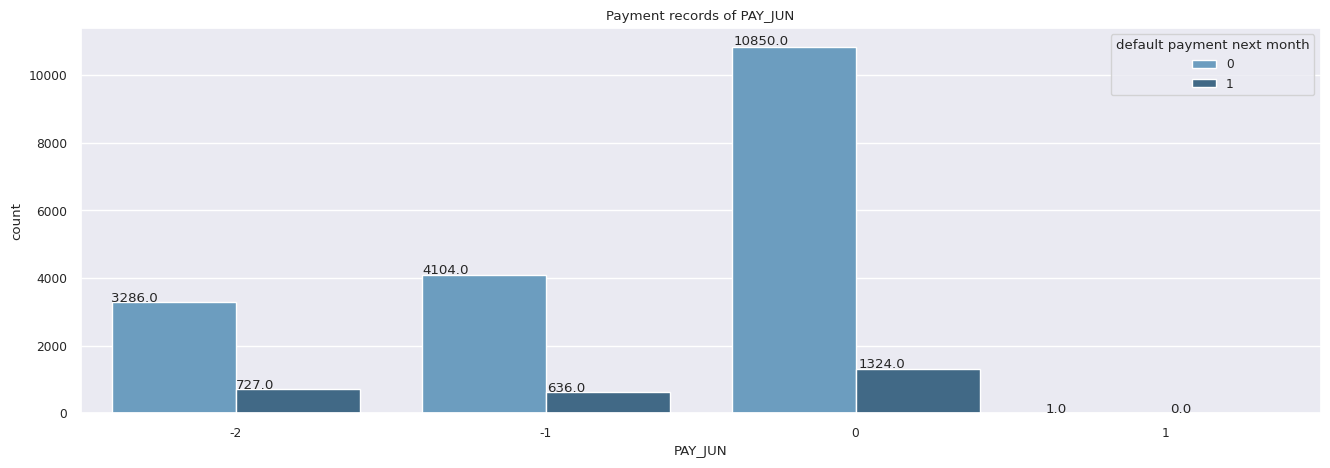

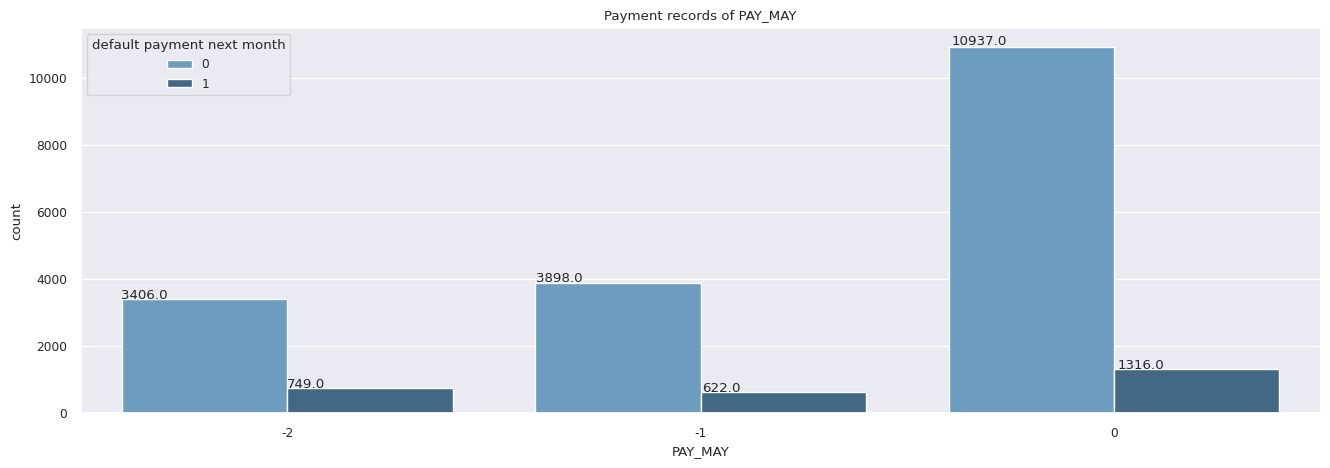

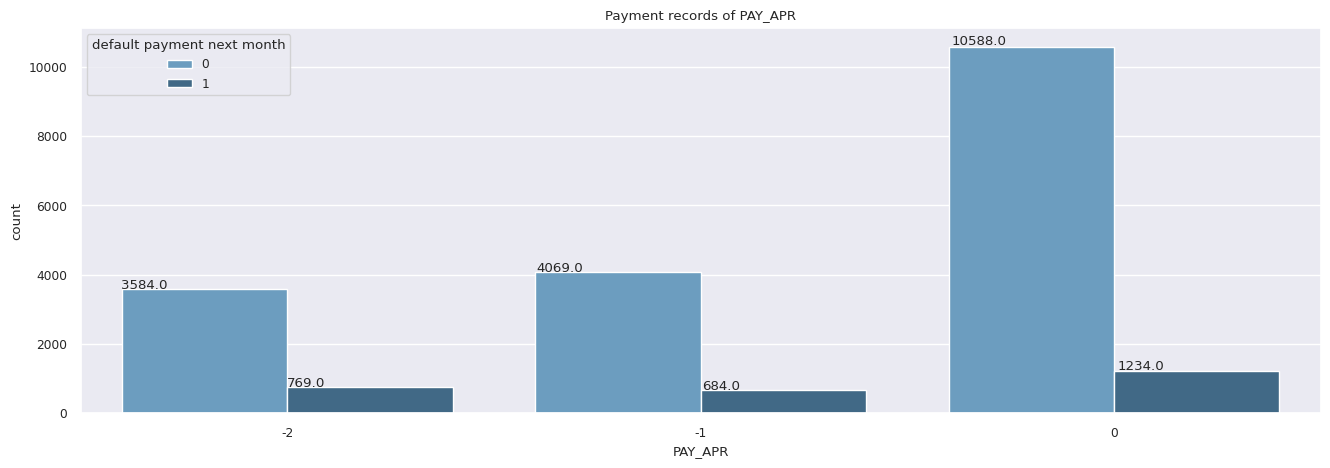

In [162]:
# Checking history of bill payment
pay_col = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR']

for col in pay_col:
    plt.figure(figsize=(16,5))
    plt.title(f'Payment records of {col}')
    ax=sns.countplot(x = col, hue = 'default payment next month', data = data,palette ='Blues_d')
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

It is clear that people who pay duly are unlikely to default the payment.

Text(0.5, 0, 'Age(yrs)')

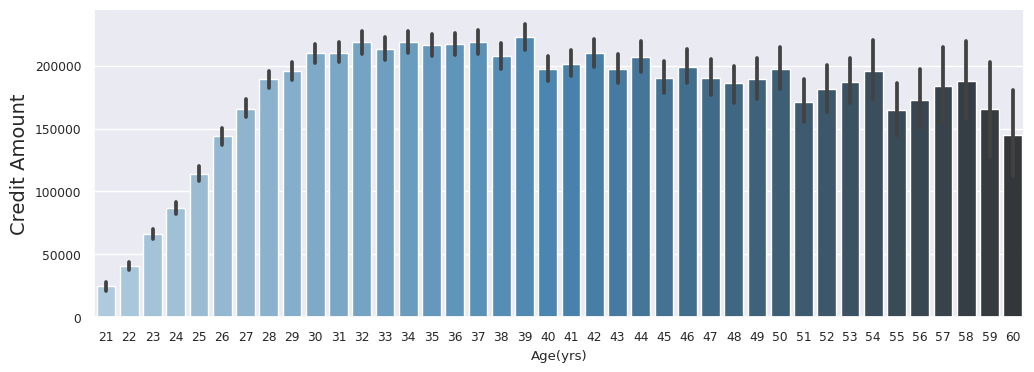

In [163]:
# Finding relation between Age and Limit balance
plt.figure(figsize=(12,4))
sns.barplot(x='AGE', y='LIMIT_BAL', data=data, palette='Blues_d')
plt.ylabel('Credit Amount',fontdict={'fontsize':14})
plt.xlabel('Age(yrs)')

Text(0.5, 0, 'Age(yrs)')

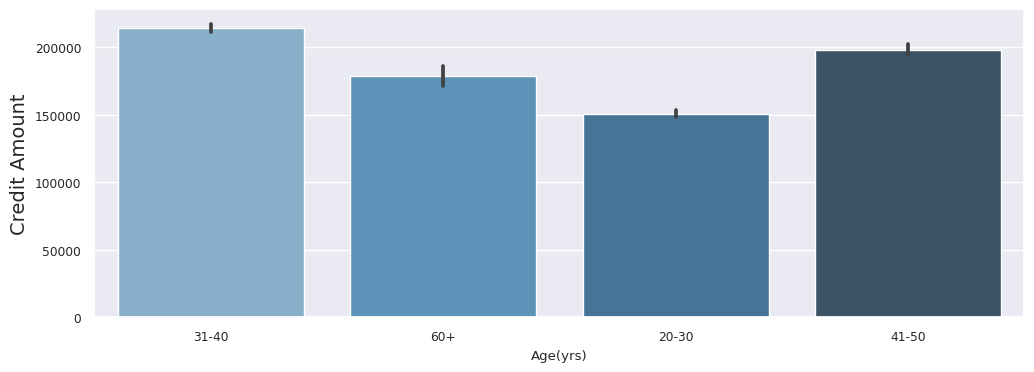

In [164]:
# Finding relation between Age and Limit balance
plt.figure(figsize=(12,4))
sns.barplot(x='ageBin', y='LIMIT_BAL', data=data, palette='Blues_d')
plt.ylabel('Credit Amount',fontdict={'fontsize':14})
plt.xlabel('Age(yrs)')

It can be seen that credit bill is high between the age groups 31-60 and then it declines after 60

## Insights-

1. Number of people who will default their payment is much less than number of people who pay on time.

2. Married people are likely to default compared to singles.

3. People who pay duly are unlikely to default their payment.

4. Limit balance is high for the people with age between 31-60 and declines after that

<Axes: >

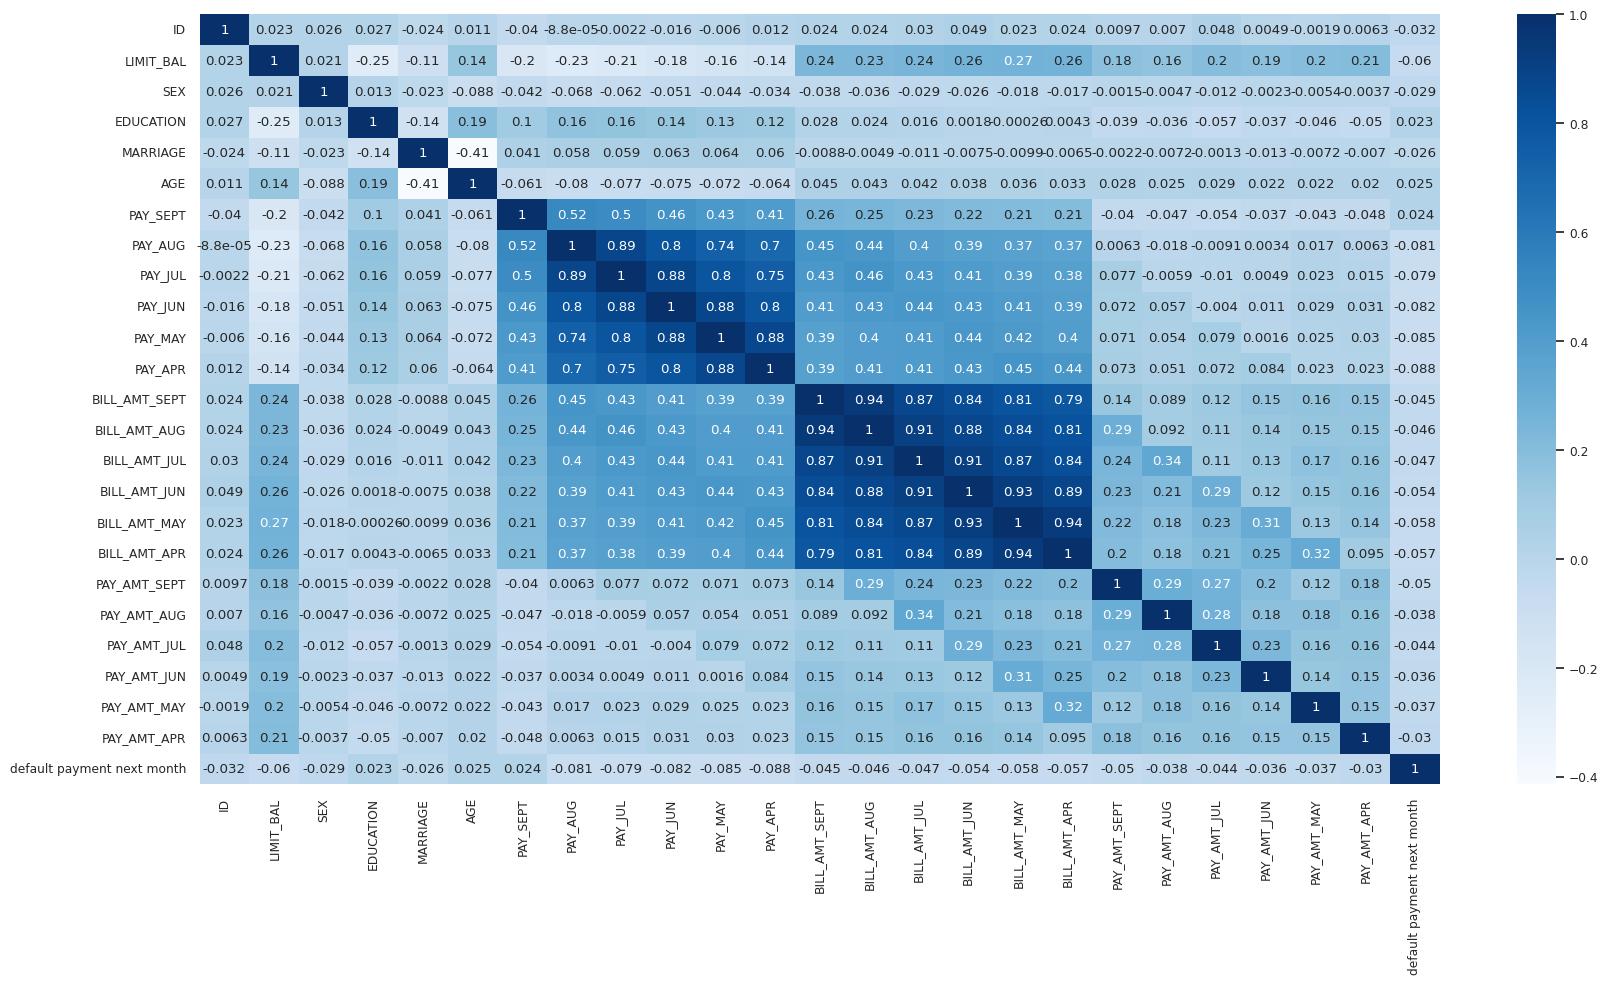

In [165]:
# Plotting correlation heatmap to check for collinearity as it may lead to bias
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True, cmap="Blues")

## Feature Engineering

In [84]:
# Creating a copy of data frame to treat multicollinearity
df = data.copy()
df['Payement_Value'] = df['PAY_AMT_SEPT'] + df['PAY_AMT_AUG'] + df['PAY_AMT_JUL'] + df['PAY_AMT_JUN'] + df['PAY_AMT_MAY'] + df['PAY_AMT_APR']

df['Dues'] = (df['BILL_AMT_APR']+df['BILL_AMT_MAY']+df['BILL_AMT_JUN']+df['BILL_AMT_JUL']+df['BILL_AMT_SEPT'])-(df['PAY_AMT_APR'])

df_fr = df.drop(['ID','BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR','ageBin'],axis=1)

<Axes: >

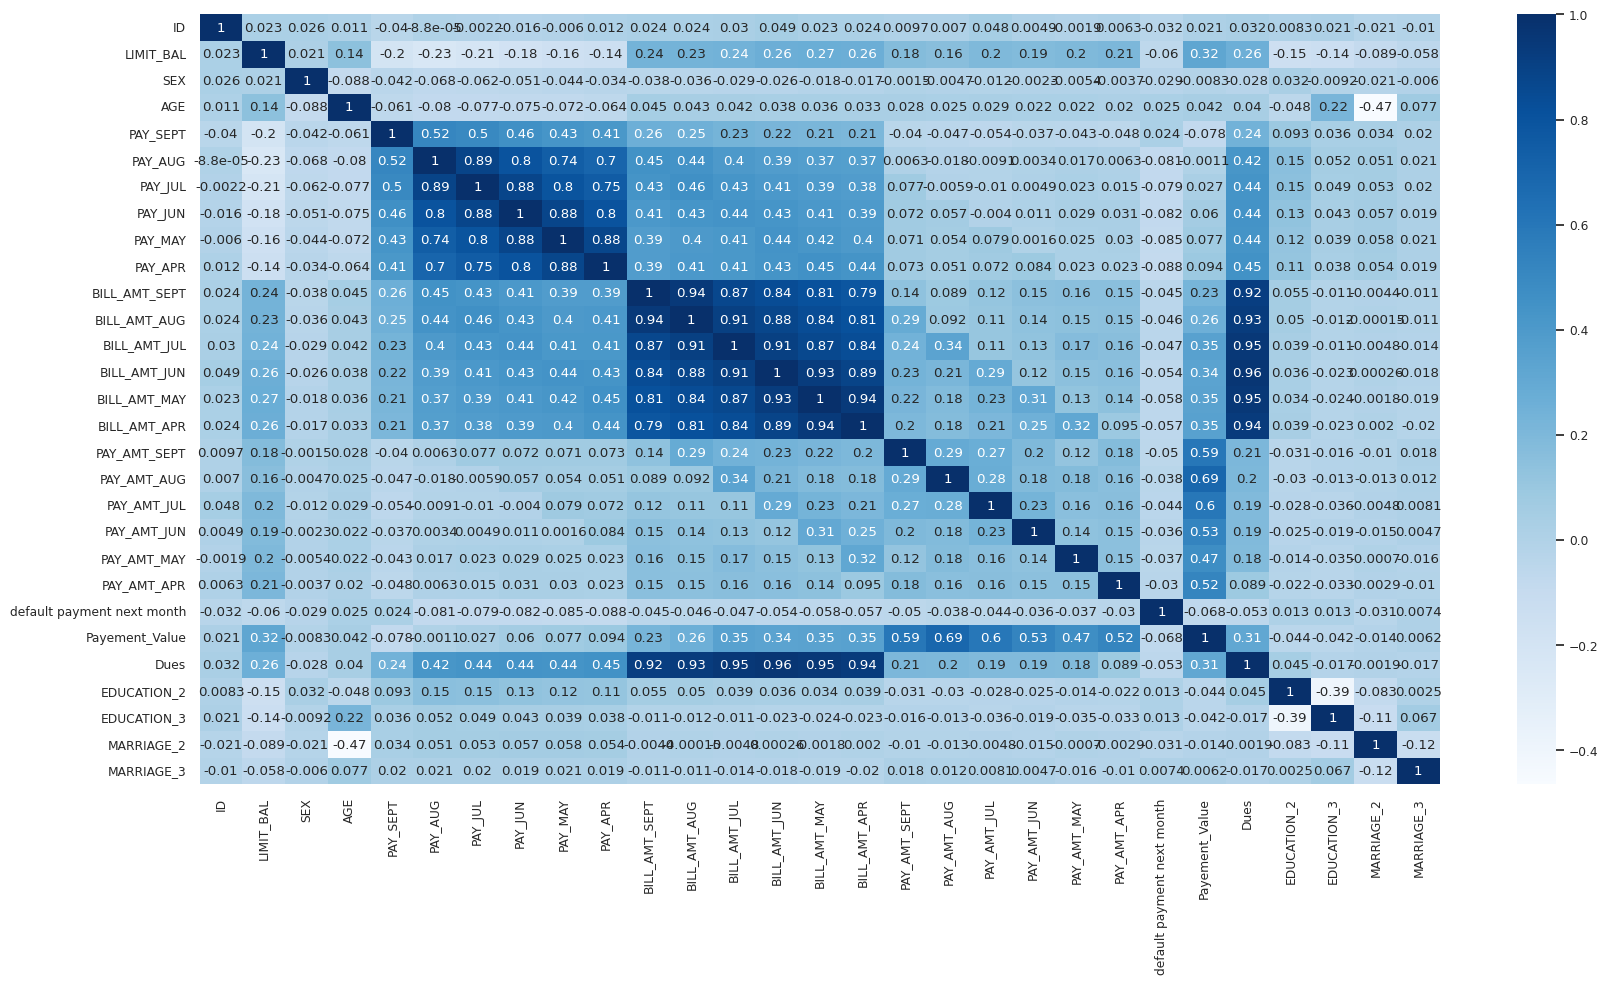

In [166]:
# Plotting heatmap to find if collinearity is reduced
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True, cmap="Blues")

In [86]:
# Encoding the categorical variables Education and Marriage 
df = pd.get_dummies(columns = ['EDUCATION','MARRIAGE'], data = df,drop_first=True)

In [87]:
df.head()

ID  LIMIT_BAL  SEX  AGE  PAY_SEPT  PAY_AUG  PAY_JUL  PAY_JUN  PAY_MAY  \
2   3      90000    2   34         0        0        0        0        0   
3   4      50000    2   37         0        0        0        0        0   
4   5      50000    1   57        -1        0       -1        0        0   
5   6      50000    1   37         0        0        0        0        0   
6   7     500000    1   29         0        0        0        0        0   

   PAY_APR  ...  PAY_AMT_MAY  PAY_AMT_APR  default payment next month  ageBin  \
2        0  ...         1000         5000                           0   31-40   
3        0  ...         1069         1000                           0   31-40   
4        0  ...          689          679                           0     60+   
5        0  ...         1000          800                           0   31-40   
6        0  ...        13750        13770                           0   20-30   

   Payement_Value     Dues  EDUCATION_2  EDUCATION_3  MARRIAGE_2  MARRIAGE_3  
2           11018    82626            1            0           1           0  
3            8388   182101            1            0           0           0  
4           59049   102990            1            0           0           0  
5            7772   180245            0            0           1           0  
6          180759  2298802            0            0           1           0  

[5 rows x 30 columns]

In [93]:
# Splitting the dataset 
X = df.drop('default payment next month',axis=1)
y = df['default payment next month']

In [96]:
X.drop('ageBin',axis=1)

ID  LIMIT_BAL  SEX  AGE  PAY_SEPT  PAY_AUG  PAY_JUL  PAY_JUN  \
2          3      90000    2   34         0        0        0        0   
3          4      50000    2   37         0        0        0        0   
4          5      50000    1   57        -1        0       -1        0   
5          6      50000    1   37         0        0        0        0   
6          7     500000    1   29         0        0        0        0   
...      ...        ...  ...  ...       ...      ...      ...      ...   
29993  29994     100000    1   38         0       -1       -1        0   
29995  29996     220000    1   39         0        0        0        0   
29996  29997     150000    1   43        -1       -1       -1       -1   
29998  29999      80000    1   41         1       -1        0        0   
29999  30000      50000    1   46         0        0        0        0   

       PAY_MAY  PAY_APR  ...  PAY_AMT_JUL  PAY_AMT_JUN  PAY_AMT_MAY  \
2            0        0  ...         1000         1000         1000   
3            0        0  ...         1200         1100         1069   
4            0        0  ...        10000         9000          689   
5            0        0  ...          657         1000         1000   
6            0        0  ...        38000        20239        13750   
...        ...      ...  ...          ...          ...          ...   
29993        0        0  ...         4000         3000         2000   
29995        0        0  ...         5003         3047         5000   
29996        0        0  ...         8998          129            0   
29998        0       -1  ...         1178         1926        52964   
29999        0        0  ...         1430         1000         1000   

       PAY_AMT_APR  Payement_Value     Dues  EDUCATION_2  EDUCATION_3  \
2             5000           11018    82626            1            0   
3             1000            8388   182101            1            0   
4              679           59049   102990            1            0   
5              800            7772   180245            0            0   
6            13770          180759  2298802            0            0   
...            ...             ...      ...          ...          ...   
29993         2000          124784   299141            0            0   
29995         1000           42550   531534            0            1   
29996            0           14490    19354            0            1   
29998         1804          147181   186428            0            1   
29999         1000            8308   180969            1            0   

       MARRIAGE_2  MARRIAGE_3  
2               1           0  
3               0           0  
4               0           0  
5               1           0  
6               1           0  
...           ...         ...  
29993           1           0  
29995           0           0  
29996           1           0  
29998           0           0  
29999           0           0  

[20928 rows x 28 columns]

## Handling imbalance data

In [103]:
# Using Smote for handling data imbalance
smote = SMOTE()
X = pd.get_dummies(X)
X_sm, Y_sm = smote.fit_resample(X,y)

# summarize the new class distribution
Y_sm.value_counts()

0    18241
1    18241
Name: default payment next month, dtype: int64

In [105]:
# scaling the data using standard scalar tranformation
scale = StandardScaler()
x_std = scale.fit_transform(X_sm)

In [106]:
from sklearn import model_selection

In [107]:
# Train-Test Split for splitting the dataset into training and validation sets
x_train,x_test,y_train,y_test = model_selection.train_test_split(x_std,Y_sm,test_size=0.2)

## Logistic Regression

In [108]:
# Training Logistic Regression model
logistic = LogisticRegression(max_iter=200,random_state=42)
logistic.fit(x_train,y_train)
# Predicting using our trained Logistic regression model
y_pred = logistic.predict(x_test)

<Axes: >

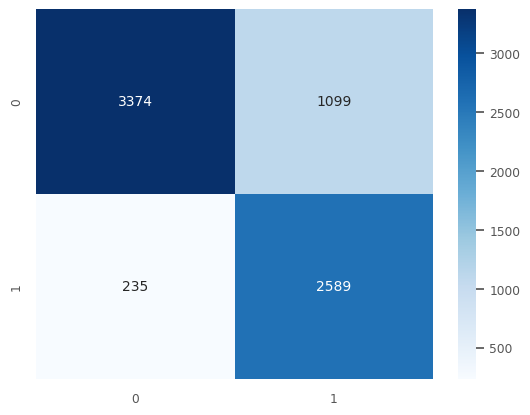

In [109]:
# Creating confusion matrix 
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True,fmt='d', cmap="Blues")

In [116]:
from sklearn.metrics import roc_auc_score

In [117]:
# Checking the classification metrics
log_prec=precision_score(y_pred,y_test)
log_rec=recall_score(y_pred,y_test)
log_acc=accuracy_score(y_pred,y_test)
log_f1=f1_score(y_pred,y_test)
log_roc=roc_auc_score(y_pred,y_test)

# Printing the classification metrics
print('\033[1mLogistic Regression Classifier Model Metrics:\033[0m')
print(f"Precision Score: {log_prec}\nRecall Score: {log_rec}\nAccuracy Score: {log_acc}\nF1 Score: {log_f1}\nAUC-ROC score: {log_roc}")

Logistic Regression Classifier Model Metrics:
Precision Score: 0.7020065075921909
Recall Score: 0.9167847025495751
Accuracy Score: 0.8171851445799644
F1 Score: 0.79514742014742
AUC-ROC score: 0.8355441509617986


## Support Vector Machine

In [120]:
# Training Support Vector Classifier Model
svm =SVC(random_state=42)
svm.fit(x_train,y_train)
# Predicting using our trained Support Vector Classifier model
y_pred = svm.predict(x_test)

<Axes: >

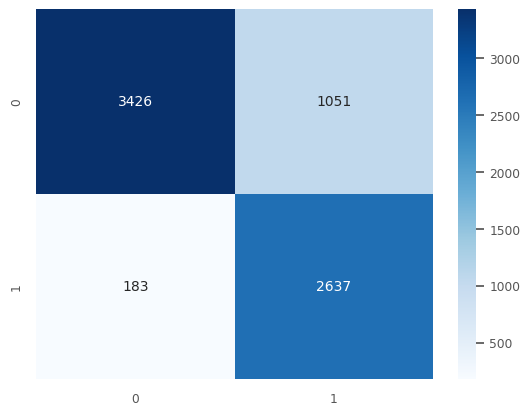

In [121]:
# Creating confusion matrix to check TP,FP,FN,TN
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True,fmt='d', cmap="Blues")

In [122]:
# Checking the classification metrics
svm_prec=precision_score(y_pred,y_test)
svm_rec=recall_score(y_pred,y_test)
svm_acc=accuracy_score(y_pred,y_test)
svm_f1=f1_score(y_pred,y_test)
svm_roc=roc_auc_score(y_pred,y_test)

# Printing the classification metrics
print('\033[1mSupport Vector Classifier Model Metrics:\033[0m')
print(f"Precision Score: {svm_prec}\nRecall Score: {svm_rec}\nAccuracy Score: {svm_acc}\nF1 Score: {svm_f1}\nAUC-ROC score: {svm_roc}")

Support Vector Classifier Model Metrics:
Precision Score: 0.7150216919739696
Recall Score: 0.9351063829787234
Accuracy Score: 0.8308894066054543
F1 Score: 0.8103872157344806
AUC-ROC score: 0.8501754832025625


## Decision Tree Classifier

In [123]:
# Training Decision Tree Classifier Model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(x_train,y_train)
# Predicting using our trained Decision Tree Classifier model
y_pred = decision_tree.predict(x_test)

<Axes: >

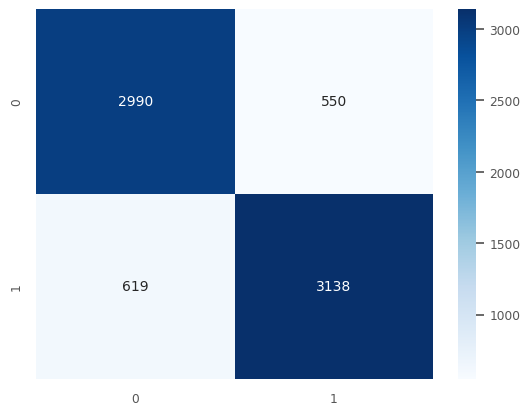

In [124]:
# Creating confusion matrix to check TP,FP,FN,TN
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True,fmt='d', cmap="Blues")

In [125]:
# Checking the classification metrics
decision_tree_prec=precision_score(y_pred,y_test)
decision_tree_rec=recall_score(y_pred,y_test)
decision_tree_acc=accuracy_score(y_pred,y_test)
decision_tree_f1=f1_score(y_pred,y_test)
decision_tree_roc=roc_auc_score(y_pred,y_test)

# Printing the classification metrics
print('\033[1mDecision Tree Classifier Model Metrics:\033[0m')
print(f"Precision Score: {decision_tree_prec}\nRecall Score: {decision_tree_rec}\nAccuracy Score: {decision_tree_acc}\nF1 Score: {decision_tree_f1}\nAUC-ROC score: {decision_tree_roc}")

Decision Tree Classifier Model Metrics:
Precision Score: 0.8508676789587852
Recall Score: 0.8352408836837902
Accuracy Score: 0.8397971769220227
F1 Score: 0.8429818670248488
AUC-ROC score: 0.8399368260226862


## Random Forest Classifier


In [126]:
# Training Random Forest Classifier Model
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(x_train,y_train)
# Predicting using our trained Random Forest Classifier model
y_pred = random_forest.predict(x_test)

<Axes: >

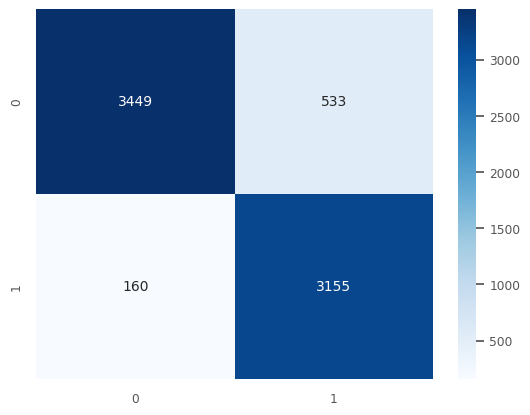

In [127]:
# Creating confusion matrix to check TP,FP,FN,TN
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True,fmt='d', cmap="Blues")

In [128]:
# Checking the classification metrics
random_forest_prec=precision_score(y_pred,y_test)
random_forest_rec=recall_score(y_pred,y_test)
random_forest_acc=accuracy_score(y_pred,y_test)
random_forest_f1=f1_score(y_pred,y_test)
random_forest_roc=roc_auc_score(y_pred,y_test)

# Printing the classification metrics
print('\033[1mRandom Forest Classifier Metrics:\033[0m')
print(f"Precision Score: {random_forest_prec}\nRecall Score: {random_forest_rec}\nAccuracy Score: {random_forest_acc}\nF1 Score: {random_forest_f1}\nAUC-ROC score: {random_forest_roc}")

Random Forest Classifier Metrics:
Precision Score: 0.8554772234273319
Recall Score: 0.951734539969834
Accuracy Score: 0.9050294641633548
F1 Score: 0.9010424103955447
AUC-ROC score: 0.90894110223002


## XG Boost

In [129]:
# Training Linear Regression Model
xgb_clf=xgb.XGBClassifier(max_depth=5,learning_rate=0.3,n_jobs=-1,random_state=42)
xgb_clf.fit(x_train,y_train)
# Predicting using our trained Logistic regression model
y_pred = xgb_clf.predict(x_test)

<Axes: >

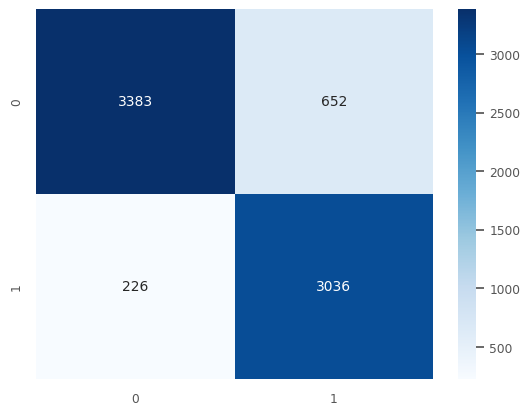

In [130]:
# Creating confusion matrix to check TP,FP,FN,TN
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True,fmt='d', cmap="Blues")

In [131]:
# Checking the classification metrics
xgb_prec=precision_score(y_pred,y_test)
xgb_rec=recall_score(y_pred,y_test)
xgb_acc=accuracy_score(y_pred,y_test)
xgb_f1=f1_score(y_pred,y_test)
xgb_roc=roc_auc_score(y_pred,y_test)

# Printing the classification metrics
print('\033[1mXGboost Model Metrics:\033[0m')
print(f"Precision Score: {xgb_prec}\nRecall Score: {xgb_rec}\nAccuracy Score: {xgb_acc}\nF1 Score: {xgb_f1}\nAUC-ROC score: {xgb_roc}")

XGboost Model Metrics:
Precision Score: 0.8232104121475055
Recall Score: 0.9307173513182097
Accuracy Score: 0.8796765794161985
F1 Score: 0.8736690647482014
AUC-ROC score: 0.8845656149403935


## HyperParameter Tuning

## Logistic Regression

In [132]:
# Initializing paramter grid for GridSearchCV
parameters = {'penalty':['l1','l2','elasticnet','none'],'C':list(np.linspace(0,1,11)),'max_iter':list(range(50,500,50))}

# Defining object for GridSearchCV
logistic_GCV = LogisticRegression(random_state=42)

# Using GridSearchCV that optimizes scoring parameter precision score
logistic_GCV=GridSearchCV(logistic_GCV,parameters,n_jobs=-1,scoring='precision',verbose=10)

# Fitting data to our GridSearchCV object 
logistic_GCV.fit(x_train,y_train)
# Predicting Using GridSearchCV
y_pred = logistic_GCV.predict(x_test)

Fitting 5 folds for each of 396 candidates, totalling 1980 fits


<Axes: >

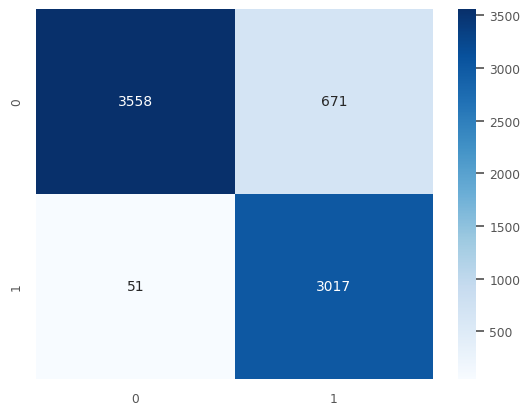

In [133]:
# Creating confusion matrix to check TP,FP,FN,TN
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True,fmt='d', cmap="Blues")

In [134]:
# Printing the metrics for GridSearchCV
log_prec_gcv=precision_score(y_pred,y_test)
log_rec_gcv=recall_score(y_pred,y_test)
log_acc_gcv=accuracy_score(y_pred,y_test)
log_f1_gcv=f1_score(y_pred,y_test)
log_roc_gcv=roc_auc_score(y_pred,y_test)

# Printing the classification metrics
print('\033[1mBest Parameters for Logistic Regression according to GCV:\033[0m',logistic_GCV.best_params_)
print('\033[1mTuned Logistic Regression Model Metrics:\033[0m')
print(f"Precision Score: {log_prec_gcv}\nRecall Score: {log_rec_gcv}\nAccuracy Score: {log_acc_gcv}\nF1 Score: {log_f1_gcv}\nAUC-ROC score: {log_roc_gcv}")

Best Parameters for Logistic Regression according to GCV: {'C': 0.1, 'max_iter': 350, 'penalty': 'none'}
Tuned Logistic Regression Model Metrics:
Precision Score: 0.818058568329718
Recall Score: 0.9833767926988266
Accuracy Score: 0.9010552281759627
F1 Score: 0.8931320307874483
AUC-ROC score: 0.9123552206577604


## Support Vector Classifier

In [135]:
# Initializing paramter grid for GridSearchCV
parameters = {'C':list(np.linspace(0,1,11))}

# Defining object for GridSearchCV
SVC_GCV = SVC(random_state=42)

# Using GridSearchCV that optimizes scoring parameter precision score
SVC_GCV=GridSearchCV(SVC_GCV,parameters,n_jobs=-1,scoring='precision',verbose=10)

# Fitting data to our GridSearchCV object 
SVC_GCV.fit(x_train,y_train)
# Predicting Using GridSearchCV
y_pred = SVC_GCV.predict(x_test)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


<Axes: >

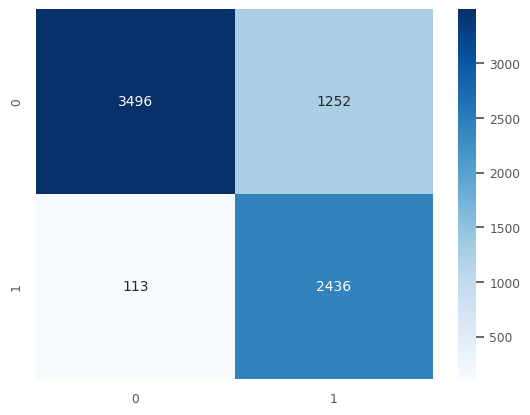

In [136]:
# Creating confusion matrix to check TP,FP,FN,TN
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True,fmt='d', cmap="Blues")

In [137]:
# Checking the classification metrics
svc_prec_gcv=precision_score(y_pred,y_test)
svc_rec_gcv=recall_score(y_pred,y_test)
svc_acc_gcv=accuracy_score(y_pred,y_test)
svc_f1_gcv=f1_score(y_pred,y_test)
svc_roc_gcv=roc_auc_score(y_pred,y_test)

# Printing the classification metrics
print('\033[1mBest Parameters for Support Vector Classifier according to GCV:\033[0m',SVC_GCV.best_params_)
print('\033[1mSupport Vector Classifier Model Metrics:\033[0m')
print(f"Precision Score: {svc_prec_gcv}\nRecall Score: {svc_rec_gcv}\nAccuracy Score: {svc_acc_gcv}\nF1 Score: {svc_f1_gcv}\nAUC-ROC score: {svc_roc_gcv}")

Best Parameters for Support Vector Classifier according to GCV: {'C': 0.1}
Support Vector Classifier Model Metrics:
Precision Score: 0.6605206073752712
Recall Score: 0.9556688897606904
Accuracy Score: 0.8129368233520625
F1 Score: 0.7811447811447811
AUC-ROC score: 0.845989457517245


## Decision Tree Classifier

In [138]:
# Initializing paramter grid for GridSearchCV
parameters = {'min_samples_split':range(1,10),'min_samples_leaf':range(1,10)}

# Defining object for GridSearchCV
dtc_GCV = DecisionTreeClassifier(random_state=42)

# Using GridSearchCV that optimizes scoring parameter precision score
dtc_GCV=GridSearchCV(dtc_GCV,parameters,n_jobs=-1,scoring='precision',verbose=10)

# Fitting data to our GridSearchCV object 
dtc_GCV.fit(x_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 10)},
             scoring='precision', verbose=10)

In [139]:
# Predicting Using GridSearchCV
y_pred = dtc_GCV.predict(x_test)

<Axes: >

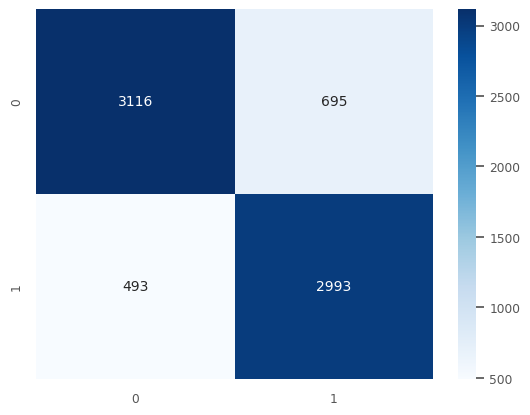

In [140]:
# Creating confusion matrix to check TP,FP,FN,TN
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True,fmt='d', cmap="Blues")

In [141]:
# Checking the classification metrics
dtc_prec_gcv=precision_score(y_pred,y_test)
dtc_rec_gcv=recall_score(y_pred,y_test)
dtc_acc_gcv=accuracy_score(y_pred,y_test)
dtc_f1_gcv=f1_score(y_pred,y_test)
dtc_roc_gcv=roc_auc_score(y_pred,y_test)

# Printing the classification metrics
print('\033[1mBest Parameters for Decision Tree Classifier according to GCV:\033[0m',dtc_GCV.best_params_)
print('\033[1mDecision Tree Classifier Model Metrics:\033[0m')
print(f"Precision Score: {dtc_prec_gcv}\nRecall Score: {dtc_rec_gcv}\nAccuracy Score: {dtc_acc_gcv}\nF1 Score: {dtc_f1_gcv}\nAUC-ROC score: {dtc_roc_gcv}")

Best Parameters for Decision Tree Classifier according to GCV: {'min_samples_leaf': 8, 'min_samples_split': 2}
Decision Tree Classifier Model Metrics:
Precision Score: 0.8115509761388287
Recall Score: 0.8585771658060815
Accuracy Score: 0.8371933671371796
F1 Score: 0.834402007248397
AUC-ROC score: 0.8381051664769059


## Random Forest

In [142]:
# Initializing paramter grid for GridSearchCV
parameters = {'min_samples_split':range(1,10),'min_samples_leaf':range(1,10)}

# Defining object for GridSearchCV
rfc_GCV = RandomForestClassifier(random_state=42)

# Using GridSearchCV that optimizes scoring parameter precision score
rfc_GCV=GridSearchCV(rfc_GCV,parameters,n_jobs=-1,scoring='precision',verbose=10)

# Fitting data to our GridSearchCV object 
rfc_GCV.fit(x_train,y_train)
# Predicting Using GridSearchCV
y_pred = rfc_GCV.predict(x_test)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


<Axes: >

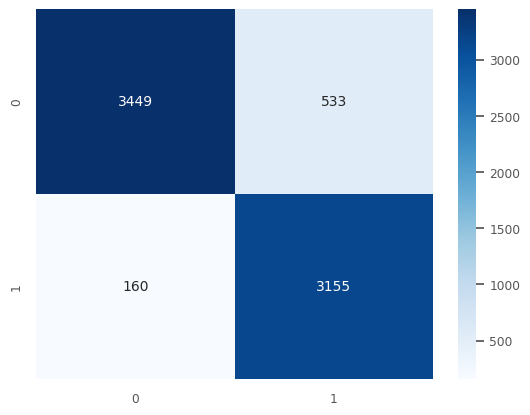

In [143]:
# Creating confusion matrix to check TP,FP,FN,TN
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True,fmt='d', cmap="Blues")

In [144]:
# Checking the classification metrics
rfc_prec_gcv=precision_score(y_pred,y_test)
rfc_rec_gcv=recall_score(y_pred,y_test)
rfc_acc_gcv=accuracy_score(y_pred,y_test)
rfc_f1_gcv=f1_score(y_pred,y_test)
rfc_roc_gcv=roc_auc_score(y_pred,y_test)

# Printing the classification metrics
print('\033[1mBest Parameters for Decision Tree Classifier according to GCV:\033[0m',dtc_GCV.best_params_)
print('\033[1mRandom Forest Classifier Model Metrics:\033[0m')
print(f"Precision Score: {rfc_prec_gcv}\nRecall Score: {rfc_rec_gcv}\nAccuracy Score: {rfc_acc_gcv}\nF1 Score: {rfc_f1_gcv}\nAUC-ROC score: {rfc_roc_gcv}")

Best Parameters for Decision Tree Classifier according to GCV: {'min_samples_leaf': 8, 'min_samples_split': 2}
Random Forest Classifier Model Metrics:
Precision Score: 0.8554772234273319
Recall Score: 0.951734539969834
Accuracy Score: 0.9050294641633548
F1 Score: 0.9010424103955447
AUC-ROC score: 0.90894110223002


## XGBoost Classifier

In [145]:
# Initializing paramter grid for GridSearchCV
parameters = {'learning_rate':list(np.linspace(0,1,11))}

# Defining object for GridSearchCV
xgb_GCV = xgb.XGBClassifier(random_state=42)

# Using GridSearchCV that optimizes scoring parameter precision score
xgb_GCV=GridSearchCV(xgb_GCV,parameters,n_jobs=-1,scoring='precision',verbose=10)

# Fitting data to our GridSearchCV object 
xgb_GCV.fit(x_train,y_train)
# Predicting Using GridSearchCV
y_pred = xgb_GCV.predict(x_test)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


<Axes: >

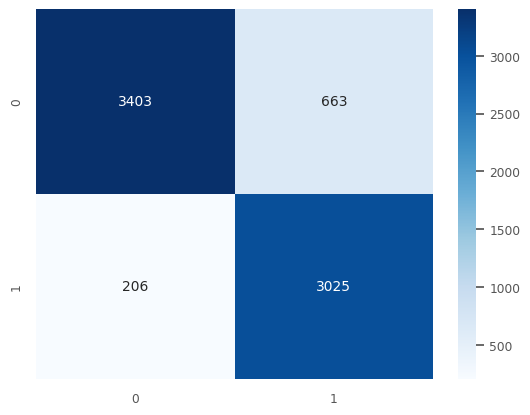

In [146]:
# Creating confusion matrix to check TP,FP,FN,TN
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True,fmt='d', cmap="Blues")

In [147]:
# Checking the classification metrics
xgb_prec_gcv=precision_score(y_pred,y_test)
xgb_rec_gcv=recall_score(y_pred,y_test)
xgb_acc_gcv=accuracy_score(y_pred,y_test)
xgb_f1_gcv=f1_score(y_pred,y_test)
xgb_roc_gcv=roc_auc_score(y_pred,y_test)

# Printing the classification metrics
print('\033[1mBest Parameters for XGBoost Classifier according to GCV:\033[0m',xgb_GCV.best_params_)
print('\033[1mXGBoost Classifier Model Metrics:\033[0m')
print(f"Precision Score: {xgb_prec_gcv}\nRecall Score: {xgb_rec_gcv}\nAccuracy Score: {xgb_acc_gcv}\nF1 Score: {xgb_f1_gcv}\nAUC-ROC score: {xgb_roc_gcv}")

Best Parameters for XGBoost Classifier according to GCV: {'learning_rate': 0.2}
XGBoost Classifier Model Metrics:
Precision Score: 0.8202277657266811
Recall Score: 0.9362426493345714
Accuracy Score: 0.8809099629984926
F1 Score: 0.8744038155802861
AUC-ROC score: 0.8865915656904042


## Plotting classification metrics

In [148]:
# Creating Lists for Un-tuned Models for Plotting

precision,recall,accuracy,f1,roc=[],[],[],[],[]
precision.extend([log_prec,svm_prec,decision_tree_prec,random_forest_prec,xgb_prec])
recall.extend([log_rec,svm_rec,decision_tree_rec,random_forest_rec,xgb_rec])
accuracy.extend([log_acc,svm_acc,decision_tree_acc,random_forest_acc,xgb_acc])
f1.extend([log_f1,svm_f1,decision_tree_f1,random_forest_f1,xgb_f1])
roc.extend([log_roc,svm_roc,decision_tree_roc,random_forest_roc,xgb_roc])
precision=[int(i*100) for i in precision]
recall=[int(i*100) for i in recall]
accuracy=[int(i*100) for i in accuracy]
f1=[int(i*100) for i in f1]
roc=[int(i*100) for i in roc]

In [149]:
# Creating Lists for Tuned Models for Plotting
precision_gcv,recall_gcv,accuracy_gcv,f1_gcv,roc_gcv=[],[],[],[],[]
precision_gcv.extend([log_prec_gcv,svc_prec_gcv,dtc_prec_gcv,rfc_prec_gcv,xgb_prec_gcv])
recall_gcv.extend([log_rec_gcv,svc_rec_gcv,dtc_rec_gcv,rfc_rec_gcv,xgb_rec_gcv])
accuracy_gcv.extend([log_acc_gcv,svc_acc_gcv,dtc_acc_gcv,rfc_acc_gcv,xgb_acc_gcv])
f1_gcv.extend([log_f1_gcv,svc_f1_gcv,dtc_f1_gcv,rfc_f1_gcv,xgb_f1_gcv])
roc_gcv.extend([log_roc_gcv,svc_roc_gcv,dtc_roc_gcv,rfc_roc_gcv,xgb_roc_gcv])
precision_gcv=[int(i*100) for i in precision_gcv]
recall_gcv=[int(i*100) for i in recall_gcv]
accuracy_gcv=[int(i*100) for i in accuracy_gcv]
f1_gcv=[int(i*100) for i in f1_gcv]
roc_gcv=[int(i*100) for i in roc_gcv]

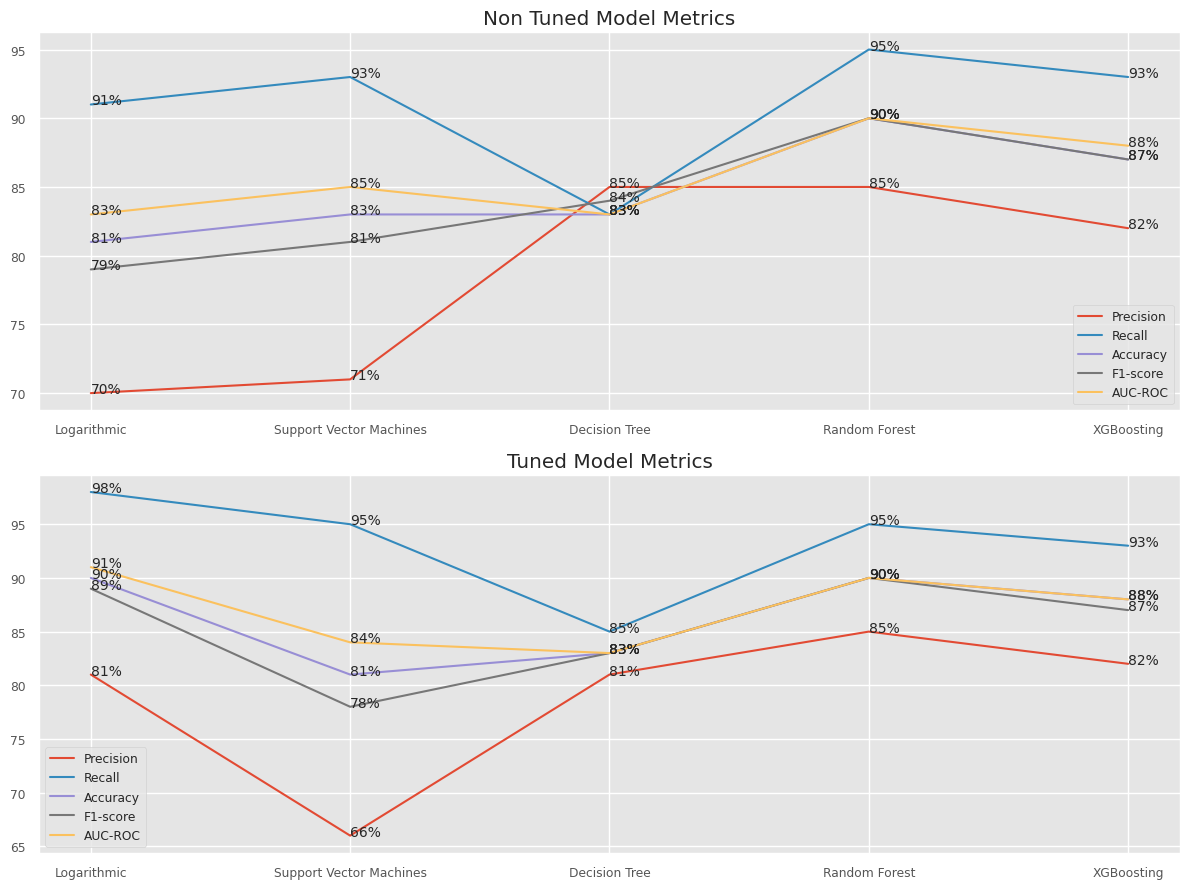

In [150]:
# Plotting the data from Above Executions
x=['Logarithmic','Support Vector Machines','Decision Tree','Random Forest','XGBoosting']
plt.figure(figsize=(12,9))
plt.subplot(2,1,1)
for i in [precision,recall,accuracy,f1,roc]:
    plt.plot(x,i)
    for a,b in zip(x,i):
        plt.text(a,b,str(b)+'%')
plt.legend(['Precision','Recall','Accuracy','F1-score','AUC-ROC'])
plt.title('Non Tuned Model Metrics')

plt.subplot(2,1,2)
for i in [precision_gcv,recall_gcv,accuracy_gcv,f1_gcv,roc_gcv]:
    plt.plot(x,i)
    for a,b in zip(x,i):
        plt.text(a,b,str(b)+'%')
plt.legend(['Precision','Recall','Accuracy','F1-score','AUC-ROC'])
plt.title('Tuned Model Metrics')
plt.tight_layout()

Text(0.5, 0.98, 'Feature Importance of Un-Tuned Models')

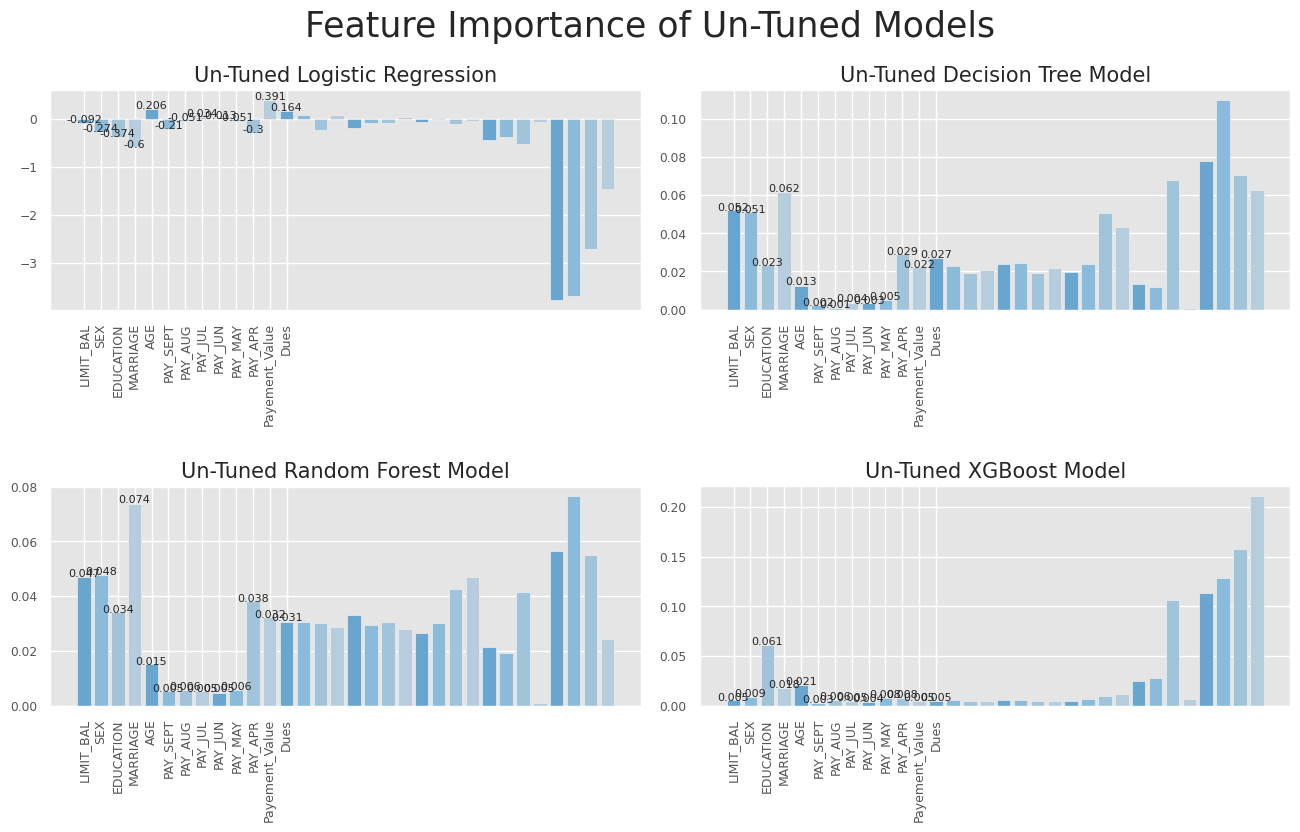

In [151]:
# Plotting Feature Importance of Un-Tuned Models

# Adding Labels to the graphs
def addlabels(x,y):              
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center',fontdict={'fontsize':8})
        
# Retreiving columns for plotting
x = df_fr.drop('default payment next month',axis=1)[:0]

# Plotting the Graphs
plt.figure(figsize=(16,8))
for i,j in enumerate([logistic,decision_tree,random_forest,xgb_clf]):
    plt.subplot(2,2,i+1)
    model=j
    if j==logistic:
        importance=model.coef_[0]
        plt.title('Un-Tuned Logistic Regression',fontsize=15)
    else:
        importance=model.feature_importances_
        if j==decision_tree:
            plt.title('Un-Tuned Decision Tree Model',fontsize=15)
        elif j==random_forest:
            plt.title('Un-Tuned Random Forest Model',fontsize=15)
        elif j==xgb_clf:
            plt.title('Un-Tuned XGBoost Model',fontsize=15)       
    plt.bar(range(len(importance)),importance,color=['#68A6D0','#8ABBDB','#A1C4DB','#B6CDDD'])
    plt.xticks(ticks=range(0,len(x.columns)),labels=x.columns,rotation=90,fontdict={'fontsize':9})
    addlabels(x.columns, [round(i,3) for i in importance])

plt.subplots_adjust(wspace=0.1,hspace=0.8)
plt.suptitle('Feature Importance of Un-Tuned Models',fontsize=25)

Text(0.5, 0.98, 'Feature Importance of Tuned Models')

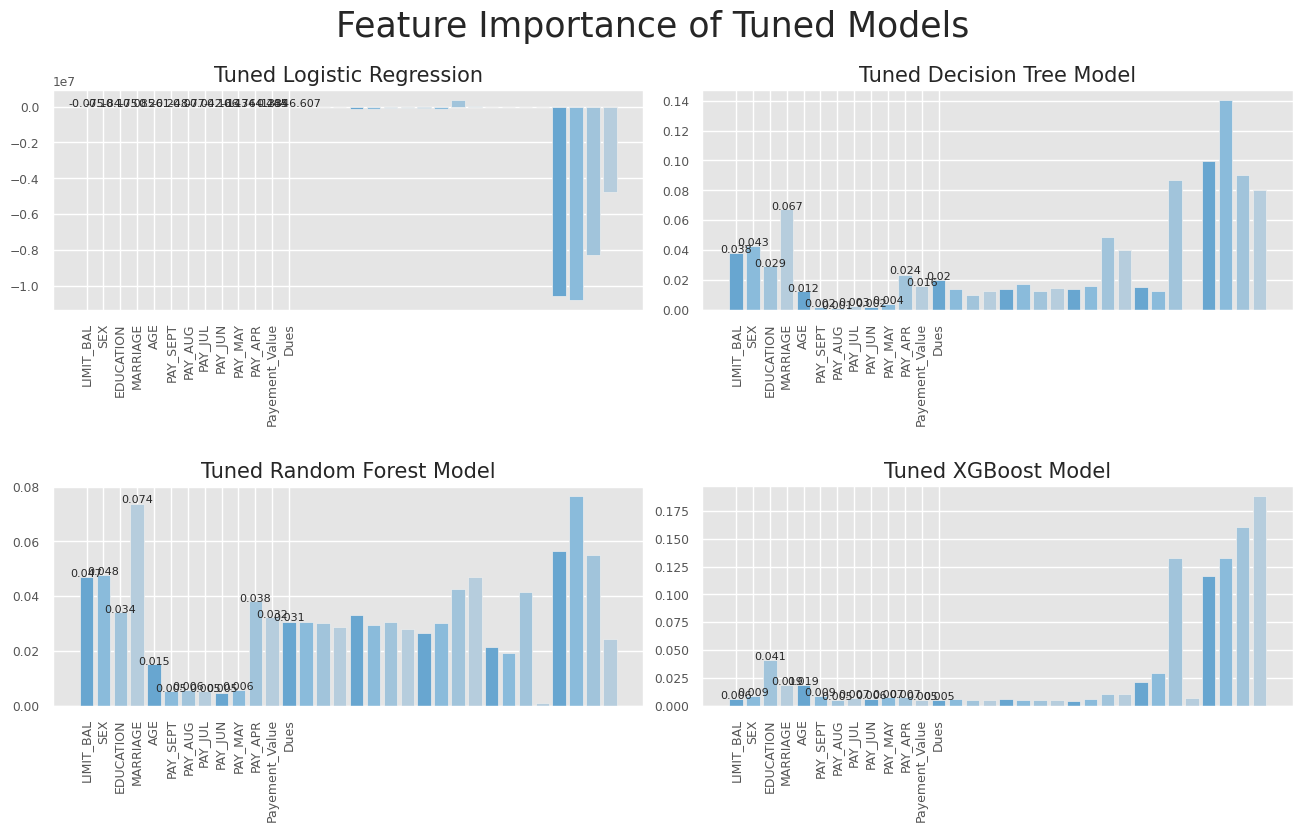

In [152]:
# Plotting Feature Importance of Un-Tuned Models

# Adding Labels to the graphs
def addlabels(x,y):              
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center',fontdict={'fontsize':8})
# Plotting the Graphs
plt.figure(figsize=(16,8))
for i,j in enumerate([logistic_GCV,dtc_GCV,rfc_GCV,xgb_GCV]):
    plt.subplot(2,2,i+1)
    model=j.best_estimator_
    if j==logistic_GCV:
        importance=model.coef_[0]
        plt.title('Tuned Logistic Regression',fontsize=15)
    else:
        importance=model.feature_importances_
        if j==dtc_GCV:
            plt.title('Tuned Decision Tree Model',fontsize=15)
        elif j==rfc_GCV:
            plt.title('Tuned Random Forest Model',fontsize=15)
        elif j==xgb_GCV:
            plt.title('Tuned XGBoost Model',fontsize=15)       
    plt.bar(range(len(importance)),importance,color=['#68A6D0','#8ABBDB','#A1C4DB','#B6CDDD'])
    plt.xticks(ticks=range(0,len(x.columns)),labels=x.columns,rotation=90,fontdict={'fontsize':9})
    addlabels(x.columns, [round(i,3) for i in importance])

plt.subplots_adjust(wspace=0.1,hspace=0.8)
plt.suptitle('Feature Importance of Tuned Models',fontsize=25)

In [153]:
from sklearn.model_selection import cross_validate,cross_val_score

In [154]:
cv_results=cross_validate(rfc_GCV.best_estimator_,x_train,y_train,scoring='accuracy',cv=3,n_jobs=-1)
print(cv_results)

{'fit_time': array([6.55381989, 6.84692717, 4.83766627]), 'score_time': array([0.38658977, 0.36364031, 0.14781737]), 'test_score': array([0.89289752, 0.89597039, 0.89884868])}


In [155]:
print('''\033[1mThe Performance of our best model :{}
with GridSearch parameters: {}
according to cross validate method of sklearn:\033[0m'''.format(rfc_GCV.best_estimator_,rfc_GCV.best_params_))
print('The average time for fitting the estimator on the train set is {}'.format(round((cv_results['fit_time'].sum())/len(cv_results['fit_time']),5)))
print('The average time for scoring the estimator on the test set is {}'.format(round((cv_results['score_time'].sum())/len(cv_results['score_time']),5)))
print('The average Accuracy for Estimator is {}'.format(round((cv_results['test_score'].sum())/len(cv_results['test_score']),5)))

The Performance of our best model :RandomForestClassifier(random_state=42)
with GridSearch parameters: {'min_samples_leaf': 1, 'min_samples_split': 2}
according to cross validate method of sklearn:
The average time for fitting the estimator on the train set is 6.07947
The average time for scoring the estimator on the test set is 0.29935
The average Accuracy for Estimator is 0.89591


## Conclusion

In our dataset, Random Forest was the best performing algorithm as shown below
Random Forest Classifier has the best value of accuracy score of 84%
Random Forest Classifier has the best value of precision score of 84%
Random Forest Classifier has the best value of recall score of 83%
Random Forest Classifier has the best value of f1 score of 84%
Random Forest Classifier has the best value of Roc_auc score of 84%
Random Forest Classifier gave the highest importance to Dues then to payment value and then to limit balance columns accordingly

Random Forest Classifier had average fitting time of 1.67 according to cross validate method of sklearn This proves Random Forest Classifier algorithm has perfectly fitted all the dataset.